### Graham Kerr
#### graham.s.kerr@NASA.gov; kerrg@cua.edu

<H1 font size="+3" style="color:red">
OZ project Project<br>
-- Scratch Notebook 
</H1>

<b>This notebook is just used for testing random bits of code and experimenting</b>





---
### <b style="color:blue"> Some set up </b>

***Import Modules***

In [100]:
##
## Import some modules
##

from scipy import io
from scipy import constants as constants
import sys
sys.path.insert(0,'/Users/gskerr1/Documents/Research/Python_Programs/radynpy/')
sys.path.insert(0,'/Users/gskerr1/Documents/Research/OrrallZirkerEffect/')


import radynpy
from radynpy.utils import RadynMovie as RM
import OrrallZirkerPy as OZpy
from OrrallZirkerPy.Atmos import AmbientPops, SuprathermalProtons 
from OrrallZirkerPy.AtomData import CSec_H3lev as H3lev
from OrrallZirkerPy.AtomData import CSec_H2lev as H2lev
from OrrallZirkerPy.AtomData import CSecActive, EinsteinA
from OrrallZirkerPy.SuprathermalPops import CalcPops
from OrrallZirkerPy.CrossSections import chebyshev_fn as Cheb
from OrrallZirkerPy.CrossSections import CrossSec
from OrrallZirkerPy.EnergyToVel import energy2vel 
from numpy.polynomial.polynomial import Polynomial as Poly


import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import LogLocator
from matplotlib import ticker
import matplotlib.colorbar as cb
import pandas as pd

import cmocean
import colorcet as ccet
import palettable as pal 
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [101]:
import importlib
importlib.reload(OZpy.CrossSections)
importlib.reload(OZpy.AtomData)
importlib.reload(OZpy.Atmos)
importlib.reload(OZpy.EnergyToVel)
importlib.reload(OZpy.SuprathermalPops)




<module 'OrrallZirkerPy.SuprathermalPops' from '/Users/gskerr1/Documents/Research/OrrallZirkerEffect/OrrallZirkerPy/SuprathermalPops.py'>

In [40]:
##
## Plot properties (these are just personal preference)
##

#Avenir LT Std
font = {'family': 'Avenir LT Std',
        'color':  'black',
        'weight': 'medium',
        'size': 22,
        }
plot_params = {'ytick.direction': 'in', 
               'xtick.direction': 'in', 
               'xtick.minor.visible': True,
               'ytick.minor.visible': True,
               'xtick.major.size': 10, 'xtick.minor.size': 5,
               'ytick.major.size': 10, 'ytick.minor.size': 5,
               'ytick.right': False,
               'xtick.top': False,
               'ytick.major.width': 1.5,
               'xtick.major.width': 1.5,
               'ytick.minor.width': 1.5,
               'xtick.minor.width': 1.5,
               'axes.linewidth': 1.5,
               'axes.spines.top': False,
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': False,
               'axes.titlepad' : 18 }

plot_lg_params = {'legend.frameon': False}
#plt.rcParams.update({'font.size': font['size'], 'font.family':font['family'], 'font.weight':font['weight'], 'font.color':font['color']})

plt.rcParams.update({'font.size':font['size'], 'font.family':font['family'], 'font.weight':font['weight']})
plt.rcParams.update({'ytick.direction': plot_params['ytick.direction'],
                     'xtick.direction': plot_params['xtick.direction'],
                     'xtick.minor.visible': plot_params['xtick.minor.visible'],
                     'ytick.minor.visible': plot_params['ytick.minor.visible'],
                     'ytick.major.size':  plot_params['ytick.major.size'], 
                     'ytick.minor.size':  plot_params['ytick.minor.size'],
                     'xtick.major.size':  plot_params['xtick.major.size'],                                
                     'xtick.minor.size':  plot_params['xtick.minor.size'],
                     'ytick.right': plot_params['ytick.right'],
                     'xtick.top': plot_params['xtick.top'],
                     'ytick.major.width': plot_params['ytick.major.width'],
                     'xtick.major.width': plot_params['xtick.major.width'],
                     'ytick.minor.width': plot_params['ytick.minor.width'],
                     'xtick.minor.width': plot_params['xtick.minor.width'],                    
                     'axes.linewidth': plot_params['axes.linewidth'],
                     'axes.spines.top' : plot_params['axes.spines.top'],
                     'axes.spines.bottom' : plot_params['axes.spines.bottom'],
                     'axes.spines.left' : plot_params['axes.spines.left'],
                     'axes.spines.right' : plot_params['axes.spines.right'],
                     'axes.titlepad' : plot_params['axes.titlepad'],
                    })

plt.rcParams.update({'legend.frameon': plot_lg_params['legend.frameon']})

mpl.mathtext.SHRINK_FACTOR = 0.6
mpl.mathtext.GROW_FACTOR = 1 / 0.6





template = dict(
        layout = go.Layout(font = dict(family = "Rockwell", size = 18),
                           title_font = dict(family = "Rockwell", size = 22), 
                           plot_bgcolor = 'white',
                           paper_bgcolor = 'white',
                           xaxis = dict(
                                showexponent = 'all',
                                exponentformat = 'e',
                                tickangle = 0,
                                linewidth = 4,
                                showgrid = True,
                            ),
                            yaxis = dict(
                          showexponent = 'all',
                          exponentformat = 'e',
                                linewidth = 4,
                                showgrid = True,
                                anchor = 'free',
                                position = 0,
                                domain = [0.0,1]
                            ),
                            coloraxis_colorbar = dict(
                                thickness = 15,
                                tickformat = '0.2f',
                                ticks = 'outside',
                                titleside = 'right'
                            )
                            ))

---
---
### <b style="color:blue"> Setting the 'active' cross sections </b>

<b>CrossSecActive.py should be modified if you want to select different cross sections. It extracts them from CrossSections.py, so they have to be located there first.</b>
> - Set up an energy range. 
> - Create the csec object to extract *all* cross sections. From this, you can create objects holding cross sections from the various sources.<br>
> - Create the active set object from the set list (either H3lev, or H2lev)... this ***does not*** require the OZpy.CrossSections.CrossSec object. <b style="color:red"> Is this confusing, should I rename some things?</b>

In [4]:
energy = np.arange(1,8001,1)
csec = OZpy.CrossSections.CrossSec(energy)
kerr = csec.cs_kerr_poly()
csactive_3lev = H3lev(energy)
csactive_2lev = H2lev(energy)



In [5]:
csactive_3lev.Q_p1


array([1.68633033e+02, 1.44360965e+02, 1.23088578e+02, ...,
       1.17513140e-10, 1.17433655e-10, 1.17354237e-10])

In [6]:
csecA = OZpy.AtomData.CSecActive(energy, nLev = 1)



>>> You have not entered a valid value of nLev (nLev = 2 or 3)
     Defaulting to nLev = 3!


In [7]:
csecA.nLev_plus_cont


4

---
---
### <b style="color:blue"> Read in a RADYN atmosphere and create the atmos object </b>
> - Does not need to be a RADYN atmosphere, can be anything that gives you hydrogen, electron, and proton number densities.<br>


In [8]:
###
### Read the RADYN atmosphere
###
dir1 = '/Users/gskerr1/Documents/Research/OrrallZirkerEffect/protonbeam_simulations/F11/'
# cdf1 = radynpy.cdf.LazyRadynData(dir1+'QSHTSL_0.75F10_d7_ec20_t30s_oneD_ne200_ext.cdf')
file1 = 'radyn_out.1000keV.5.F11.sav'

RADYN = io.readsav(dir1+file1, python_dict=True)
# RADYN = RADYN['radyn_struct']


In [69]:
nElec = RADYN['ne1t']
nHyd = np.sum(RADYN['n1t'][:,0,0:4,:],axis=1)
nProt = RADYN['n1t'][:,0,5,:]
height = RADYN['z1t']
times = RADYN['timet']


findfont: Font family ['Avenir LT Std'] not found. Falling back to DejaVu Sans.


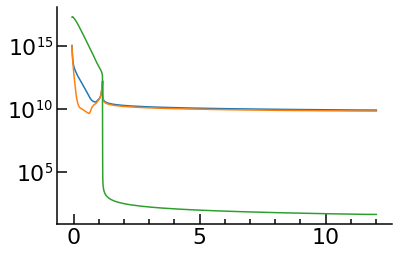

In [10]:
plt.plot(height[0,:]/1e8, nElec[0,:])
plt.plot(height[0,:]/1e8, nProt[0,:])
plt.plot(height[0,:]/1e8, nHyd[0,:])
plt.yscale('log')


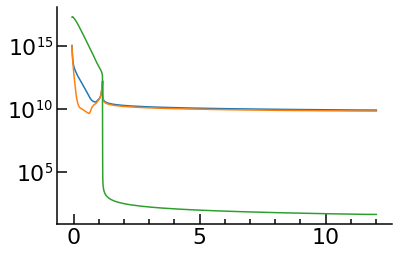

In [11]:
atmos = AmbientPops(nHyd = nHyd, nElec=nElec, nProt=nProt, height=height, times=times)
plt.plot(atmos.height[0,:]/1e8, atmos.nElec[0,:])
plt.plot(atmos.height[0,:]/1e8, atmos.nProt[0,:])
plt.plot(atmos.height[0,:]/1e8, atmos.nHyd[0,:])
plt.yscale('log')
plt.show()


---
---
### <b style="color:blue"> Test the Suprathermal Pops Code </b>



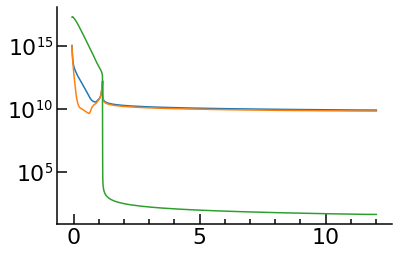

In [70]:
energy_cs = np.arange(1,8001,1)
nLev = 3
atmos = AmbientPops(nHyd = nHyd, nElec=nElec, nProt=nProt, height=height, times=times)
csecA = CSecActive(energy_cs, nLev = nLev)
debug = True
if debug == True: 
    plt.plot(atmos.height[0,:]/1e8, atmos.nElec[0,:])  
    plt.plot(atmos.height[0,:]/1e8, atmos.nProt[0,:])
    plt.plot(atmos.height[0,:]/1e8, atmos.nHyd[0,:])
    plt.yscale('log')
    plt.show()
    

In [14]:
## Number of energy bins, and convert to velocity
nE_cs = len(energy_cs)
vel_cs = energy2vel(energy_cs)
isum = -1

if len(nElec.shape) == 2:
    nDim1 = nElec.shape[0]
    nDim2 = nElec.shape[1]
if len(nElec.shape) == 1:
    nDim1 = nElec.shape[0]
    nDim2 = 1
if len(nElec.shape) == 0:
    nDim1 = 1
    nDim2 = 1

## Factor to convert cross sections to cm^2
cs2cm = 1e-17



In [15]:
Aij = EinsteinA(nLev = 4)
Aij.Aij



>>> You have not entered a valid value of nLev (nLev = 2 or 3)
     Defaulting to nLev = 3!


array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [4.69800e+08, 0.00000e+00, 0.00000e+00, 0.00000e+00],
       [5.57503e+08, 4.41018e+08, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]])

In [16]:
Npop = np.zeros([nDim1, nDim2, nLev+1, nE_cs], dtype = np.float64)
Aij = EinsteinA(nLev = 4)


for eind in range(0, nE_cs):
# for eind in range(100,101):
    ###### extend the cross section arrays to cover the height or time arrays
    ###### as needed

    ## Charge Exchange
    C_ij_CX = np.repeat(csecA.cs_CX[:, :, eind, np.newaxis], nDim1, axis=2)
    C_ij_CX = np.repeat(C_ij_CX[:, :, :, np.newaxis], nDim2, axis=3)

    ## Proton collisions
    C_ij_colP = np.repeat(csecA.cs_colP[:, :, eind, np.newaxis], nDim1, axis=2)
    C_ij_colP = np.repeat(C_ij_colP[:, :, :, np.newaxis], nDim2, axis=3)

    ## Hydrogen collisions
    C_ij_colH = np.repeat(csecA.cs_colH[:, :, eind, np.newaxis], nDim1, axis=2)
    C_ij_colH = np.repeat(C_ij_colH[:, :, :, np.newaxis], nDim2, axis=3)
 
    ## Electron collisions
    C_ij_colE = np.repeat(csecA.cs_colE[:, :, eind, np.newaxis], nDim1, axis=2)
    C_ij_colE = np.repeat(C_ij_colE[:, :, :, np.newaxis], nDim2, axis=3)

    # C_ij_CX = np.squeeze(C_ij_CX)
    # C_ij_colH = np.squeeze(C_ij_colH)
    # C_ij_colP = np.squeeze(C_ij_colP)
    # C_ij_colE = np.squeeze(C_ij_colE)


    C_ij_CX = np.multiply(C_ij_CX*cs2cm, atmos.nHyd) * vel_cs[eind]
    C_ij_colP = np.multiply(C_ij_colP*cs2cm, atmos.nProt) * vel_cs[eind]
    C_ij_colH = np.multiply(C_ij_colH*cs2cm, atmos.nHyd) * vel_cs[eind]
    C_ij_colE = np.multiply(C_ij_colE*cs2cm, atmos.nElec) * vel_cs[eind]

#     Pij = np.zeros([nLev+1, nLev+1, nDim1, nDim2], dtype = np.float64)
    
#     for iind in range(0,nLev+1):
#         for jind in range(0,nLev+1):
#             if iind!=jind:
# #                 if iind < jind:
#                     Pij[iind, jind, :, :] = Pij[iind, jind, :, :] + C_ij_colP[jind,iind, :, :]
#                     Pij[iind, jind, :, :] = Pij[iind, jind, :, :] + C_ij_colH[jind,iind, :, :]
#                     Pij[iind, jind, :, :] = Pij[iind, jind, :, :] + C_ij_colE[jind,iind, :, :]
#                     Pij[iind, jind, :, :] = Pij[iind, jind, :, :] + C_ij_CX[jind,iind, :, :]
#                     Pij[iind, iind, :, :] = Pij[iind,iind, :, :] - (C_ij_colP[iind,jind, :, :] + 
#                                                         C_ij_colH[iind,jind, :, :] +
#                                                         C_ij_colE[iind,jind, :, :])
# #                     Pij[iind, iind, :, :] = Pij[iind,iind, :, :] - Aij.Aij[iind,jind]
# #                 elif iind > jind:
# #                     Pij[iind, jind] = Pij[iind, jind] + C_ij_colP[jind,iind]
# #                     Pij[iind, jind] = Pij[iind, jind] + C_ij_colH[jind,iind]
# #                     Pij[iind, jind] = Pij[iind, jind] + C_ij_colE[jind,iind]
# #                     Pij[iind, jind] = Pij[iind, jind] + C_ij_CX[jind,iind]
# #             else: 
# #                 if Pij[iind, iind] =  Pij[iind,iind] + (-1.0*(C_ij_colP[jind,iind])

    Pij = np.zeros([nDim1, nDim2, nLev+1, nLev+1], dtype = np.float64)
    for iind in range(0,nLev+1):
        for jind in range(0,nLev+1):
            if iind!=jind:
                Pij[:, :, iind, jind] = Pij[:, :, iind, jind] + C_ij_colP[jind,iind, :, :] ## Creation
                Pij[:, :, iind, jind] = Pij[:, :, iind, jind] + C_ij_colH[jind,iind, :, :] ## Creation
                Pij[:, :, iind, jind] = Pij[:, :, iind, jind] + C_ij_colE[jind,iind, :, :] ## Creation
                Pij[:, :, iind, jind] = Pij[:, :, iind, jind] + C_ij_CX[jind,iind, :, :] ## Creation (via Charge Ex)
                Pij[:, :, iind, iind] = Pij[:, :, iind,iind] - (C_ij_colP[iind,jind, :, :] + 
                                                    C_ij_colH[iind,jind, :, :] +
                                                    C_ij_colE[iind,jind, :, :])
                Pij[:, :, iind, iind] = Pij[:, :, iind,iind] - Aij.Aij[iind,jind]
    
    ## Pij Npop = X
    ## X is the result of each equation, which is zero since we bring creation 
    ## and destruction on same side. It is a [Nlev+1 x 1] array... but we also 
    ## want to store this for each height or time point, if they are defined. 
    X = np.zeros([nDim1, nDim2, nLev+1], dtype = np.float64)

    ## Replace one of the equations with the particle conservation equation
    Pij[:,:,isum,:] = 1.0

    NthmProtons = 1.0 ## temp... normalise to 1, I guess?
    X[:,:, isum] = NthmProtons ### 
    
    Npop[:,:,:,eind] = np.linalg.solve(Pij, X)


In [102]:
Nthm_Pops_t0 = CalcPops(energy_cs, nHyd[0,:], nElec[0,:], nProt[0,:], height[0,:], times[0], nLev=3, isum=-1)

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1)
191
1
(191, 1, 4, 4)
(4, 4, 191, 1

In [68]:
eind = 100
nDim1 = 191
nDim2 = 1
C_ij_CX = np.repeat(csecA.cs_CX[:, :, eind, np.newaxis], nDim1, axis=2)
C_ij_CX = np.repeat(C_ij_CX[:, :, :, np.newaxis], nDim2, axis=3)
C_ij_colP = np.repeat(csecA.cs_colP[:, :, eind, np.newaxis], nDim1, axis=2)
C_ij_colP = np.repeat(C_ij_colP[:, :, :, np.newaxis], nDim2, axis=3)
C_ij_colP.shape
# nProt = nProt[0,:]
nProt = np.array(RADYN['n1t'][0,0,5,:])
nProt = np.repeat(nProt[:, np.newaxis],1, axis=1)
nProt.shape

(191, 1)

(58, 191, 4, 8000)


(0.0, 2.0)

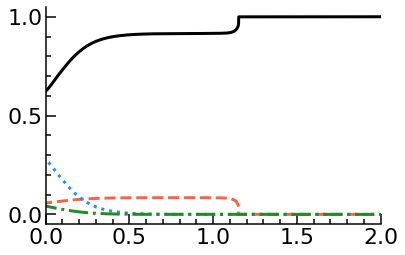

In [25]:
print(Npop.shape)
eind = 100
plt.plot(atmos.height[0,:]/1e8, Npop[0,:,3, eind], color = 'black', linestyle = '-', linewidth = 3)
plt.plot(atmos.height[0,:]/1e8, Npop[0,:,0, eind], color = 'tomato', linestyle = '--', linewidth = 3)
plt.plot(atmos.height[0,:]/1e8, Npop[0,:,1, eind], color = 'dodgerblue', linestyle = ':', linewidth = 3)
plt.plot(atmos.height[0,:]/1e8, Npop[0,:,2, eind], color = 'forestgreen', linestyle = '-.', linewidth = 3)

plt.xlim([0,2])
# plt.ylim([0,0.05])


(58, 191, 4, 8000)


(0.0, 2.0)

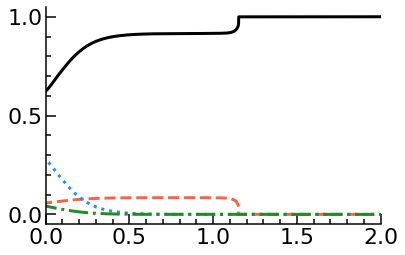

In [27]:
print(Nthm_Pops.shape)
eind = 100
plt.plot(atmos.height[0,:]/1e8, Nthm_Pops[0,:,3, eind], color = 'black', linestyle = '-', linewidth = 3)
plt.plot(atmos.height[0,:]/1e8, Nthm_Pops[0,:,0, eind], color = 'tomato', linestyle = '--', linewidth = 3)
plt.plot(atmos.height[0,:]/1e8, Nthm_Pops[0,:,1, eind], color = 'dodgerblue', linestyle = ':', linewidth = 3)
plt.plot(atmos.height[0,:]/1e8, Nthm_Pops[0,:,2, eind], color = 'forestgreen', linestyle = '-.', linewidth = 3)

plt.xlim([0,2])
# plt.ylim([0,0.05])



(191, 4, 8000)


(0.0, 2.0)

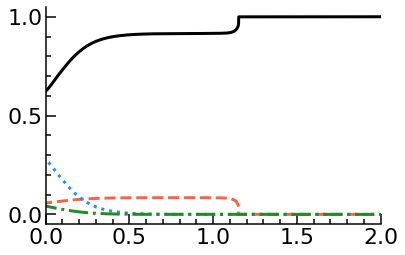

In [103]:
print(Nthm_Pops_t0.shape)
eind = 100
plt.plot(atmos.height[0,:]/1e8, Nthm_Pops_t0[:,3, eind], color = 'black', linestyle = '-', linewidth = 3)
plt.plot(atmos.height[0,:]/1e8, Nthm_Pops_t0[:,0, eind], color = 'tomato', linestyle = '--', linewidth = 3)
plt.plot(atmos.height[0,:]/1e8, Nthm_Pops_t0[:,1, eind], color = 'dodgerblue', linestyle = ':', linewidth = 3)
plt.plot(atmos.height[0,:]/1e8, Nthm_Pops_t0[:,2, eind], color = 'forestgreen', linestyle = '-.', linewidth = 3)

plt.xlim([0,2])
# plt.ylim([0,0.05])




In [ ]:
((C_ij_colP[0,1] + C_ij_colH[0,1] + C_ij_colE[0,1]) +
 (C_ij_colP[0,2] + C_ij_colH[0,2] + C_ij_colE[0,2]) +
 (C_ij_colP[0,3] + C_ij_colH[0,3] + C_ij_colE[0,3]) )


In [ ]:
Pij.shape
# print(Pij[1,0,0,:])
# # iind = 1
# # # jiind = 
print(C_ij_colP[2,1,0,:]+C_ij_colH[3,1,:]+C_ij_colE[2,1,0,:])
# plt.plot(atmos.height[0,:]/1e8,Pij[2,0,0,:])
# plt.plot(atmos.height[0,:]/1e8,Pij[2,0,0,:])


# plt.plot(atmos.height[0,:]/1e8,(C_ij_colP[0,2,0,:]+C_ij_colH[0,2,0,:]+C_ij_colE[0,2,0,:]))
# plt.yscale('log')


In [ ]:
Aij = np.array


In [ ]:
for iind in range(0,nLev+1):
    for jind in range(0,nLev+1):
#         if iind < jind:
#             print(iind,jind)
        if iind > jind:
            print(iind,jind)
            

In [ ]:
plt.plot(atmos.height[0,:]/1e8, C_ij_CX[3,0,0,:]/vel_cs[eind])
plt.plot(atmos.height[0,:]/1e8, C_ij_CX[3,1,0,:]/vel_cs[eind])
plt.plot(atmos.height[0,:]/1e8, C_ij_CX[3,2,0,:]/vel_cs[eind])

# plt.plot(atmos.height[0,:]/1e8,Pij[1,0,0,:])
plt.yscale('log')


In [ ]:
# plt.plot(atmos.height[0,:]/1e8, C_ij_CX[3,0,0,:])
# plt.plot(atmos.height[0,:]/1e8, C_ij_CX[3,1,0,:])
# plt.plot(atmos.height[0,:]/1e8, C_ij_CX[3,2,0,:])
# # 
# plt.plot(atmos.height[0,:]/1e8,Pij[0,3,0,:])
# plt.plot(atmos.height[0,:]/1e8,Pij[1,3,0,:])
# plt.plot(atmos.height[0,:]/1e8,Pij[2,3,0,:])
# plt.plot(atmos.height[0,:]/1e8,Pij[0,3,0,:])
# plt.plot(atmos.height[0,:]/1e8,Pij[0,:,1,1]*-1)
# plt.plot(atmos.height[0,:]/1e8,Pij[0,:,2,2]*-1)
# plt.plot(atmos.height[0,:]/1e8,Pij[0,:,3,3]*-1)

plt.plot(atmos.height[0,:]/1e8,Pij[0,:,0,0]*-1)
plt.plot(atmos.height[0,:]/1e8,Pij[0,:,1,1]*-1)
plt.plot(atmos.height[0,:]/1e8,Pij[0,:,2,2]*-1)

# plt.plot(atmos.height[0,:]/1e8,Pij[0,0,0,:]*-1, color = 'black')
# plt.plot(atmos.height[0,:]/1e8,Pij[1,1,0,:]*-1, color = 'pink')
# plt.plot(atmos.height[0,:]/1e8,Pij[2,2,0,:]*-1, color = 'dodgerblue')
plt.axhline(Aij.Aij[1,0], color = 'red', linestyle = '--', linewidth = 2)
plt.axhline(Aij.Aij[2,0]+Aij.Aij[2,1], color = 'darkblue', linestyle = '--', linewidth = 2)

plt.yscale('log')
plt.xlim([0,3])


In [ ]:
C_ij_colP[0,0,0,:]
